<a href="https://colab.research.google.com/github/Roman37373/hw/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%964_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD_%D0%9A%D1%83%D0%BB%D0%B5%D0%B1%D0%B0%D0%BA%D0%B8%D0%BD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# train_df.csv не загружал на github из-за большого размера файла
train_df = pd.read_csv('data/train.csv')
#lectures_df = pd.read_csv('sample_data/lectures.csv')
#questions_df = pd.read_csv('sample_data/questions.csv')

In [ ]:
lectures_df = pd.read_csv('https://raw.githubusercontent.com/Roman37373/hw/refs/heads/main/lectures.csv')
questions_df = pd.read_csv('https://raw.githubusercontent.com/Roman37373/hw/refs/heads/main/questions.csv')

# Загрузка и исследование данных
## train

In [ ]:
# проверяю успешность загрузки
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
train_df.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True


In [ ]:
# оцениваю количество пользователей
train_df['user_id'].value_counts()

user_id
801103753     17917
1478712595    16914
1842816145    16851
455973631     16789
1660941992    16777
              ...  
1032404821        1
1409178561        1
1137880031        1
1777952220        1
1071441751        1
Name: count, Length: 393656, dtype: int64

In [ ]:
# оцениваю размерность
train_df.shape

(101230332, 10)

In [ ]:
# оцениваю типы данных
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [ ]:
# оцениваю id взаимодействия
train_df['content_id'].value_counts()

content_id
6116     213605
6173     202106
4120     199372
175      195861
7876     190170
          ...  
10033         1
1486          1
21169         1
1485          1
10005         1
Name: count, Length: 13782, dtype: int64

In [ ]:
# оцениваю количество форм взаимодействия
train_df['content_type_id'].value_counts()

content_type_id
0    99271300
1     1959032
Name: count, dtype: int64

In [ ]:
# количество id пакетов взаимодействия
train_df['task_container_id'].value_counts()

task_container_id
14      804285
15      798539
4       692079
5       690051
6       688813
         ...  
9927       174
9999       174
9925       172
9937       172
9926       170
Name: count, Length: 10000, dtype: int64

In [ ]:
# оцениваю количество ответов пользователя
train_df['user_answer'].value_counts()

user_answer
 0    28186489
 1    26990007
 3    26084784
 2    18010020
-1     1959032
Name: count, dtype: int64

In [ ]:
# оцениваю количество и качество ответов пользователя
train_df['answered_correctly'].value_counts()

answered_correctly
 1    65244627
 0    34026673
-1     1959032
Name: count, dtype: int64

In [ ]:
# оцениваю время затраченное на предыдущее взаимодействие
train_df['prior_question_elapsed_time'].value_counts()

prior_question_elapsed_time
17000.0     5154588
16000.0     4752104
18000.0     4670915
19000.0     4017031
15000.0     3640279
             ...   
252800.0          1
297666.0          1
283750.0          1
270333.0          1
256400.0          1
Name: count, Length: 3258, dtype: int64

In [ ]:
# оцениваю время затраченное на предыдущее взаимодействие
train_df['prior_question_had_explanation'].value_counts()

prior_question_had_explanation
True     89685560
False    11152266
Name: count, dtype: int64

In [ ]:
# оцениваю количество отсутствующих данных
train_df.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

# lectures

In [6]:
# проверяю успешность загрузки
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [ ]:
# оцениваю размерность
lectures_df.shape

(418, 4)

In [ ]:
# оцениваю типы данных и количество отсутствующих данных
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [ ]:
# оцениваю id лекций
lectures_df['lecture_id'].value_counts()

lecture_id
89       1
24908    1
22792    1
22711    1
22619    1
        ..
11873    1
11772    1
11559    1
11485    1
32736    1
Name: count, Length: 418, dtype: int64

In [ ]:
# оцениваю количество групп лекций
lectures_df['tag'].value_counts()

tag
136    7
27     6
161    6
74     6
134    6
      ..
90     1
112    1
31     1
138    1
2      1
Name: count, Length: 151, dtype: int64

In [ ]:
# оцениваю количество разделов теста
lectures_df['part'].value_counts()

part
5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: count, dtype: int64

In [ ]:
# оцениваю цели лекций
lectures_df['type_of'].value_counts()

type_of
concept             222
solving question    186
intention             7
starter               3
Name: count, dtype: int64

# questions

In [ ]:
# проверяю успешность загрузки
display(questions_df.head())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [ ]:
# оцениваю размерность
questions_df.shape

(13523, 5)

In [ ]:
# оцениваю типы данных и количество отсутствующих данных
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [ ]:
# оцениваю правильные ответы
questions_df['correct_answer'].value_counts()

correct_answer
0    3716
3    3544
1    3478
2    2785
Name: count, dtype: int64

In [ ]:
# оцениваю количество разделов теста
questions_df['part'].value_counts()

part
5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: count, dtype: int64

In [ ]:
# оцениваю количество групп вопросов
questions_df['tags'].value_counts()

tags
8                 738
73                617
53                523
1                 413
96                373
                 ... 
157 144 81          1
157 144 38          1
106 169 162 81      1
157 169 162 81      1
157 169 92          1
Name: count, Length: 1519, dtype: int64

In [ ]:
questions_df['part'].max()

7

In [ ]:
train_df['content_id'].max()

32736

In [ ]:
# меняю типы данных датафрэйма

train_df['content_id'] = train_df['content_id'].astype('int16')
train_df['content_type_id'] = train_df['content_type_id'].astype('int8')
train_df['row_id'] = train_df['row_id'].astype('int32')
train_df['task_container_id'] = train_df['task_container_id'].astype('int16')
train_df['user_answer'] = train_df['user_answer'].astype('int8')
train_df['answered_correctly'] = train_df['answered_correctly'].astype('int8')

In [ ]:
# меняю типы данных датафрэйма
lectures_df['lecture_id'] = lectures_df['lecture_id'].astype('int16')
lectures_df['tag'] = lectures_df['tag'].astype('int8')
lectures_df['part'] = lectures_df['part'].astype('int8')

In [ ]:
# меняю типы данных датафрэйма
questions_df['question_id'] = questions_df['question_id'].astype('int16')
questions_df['bundle_id'] = questions_df['bundle_id'].astype('int16')
questions_df['correct_answer'] = questions_df['correct_answer'].astype('int8')
questions_df['part'] = questions_df['part'].astype('int8')

In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


# Описание структуры данных и их предобработка

In [ ]:
# первые статистические показатели для числовых данных
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [ ]:
# первые статистические показатели для нечисловых данных
train_df.describe(include='object')

,prior_question_had_explanation
count,100837826
unique,2
top,True
freq,89685560


In [ ]:
# первые статистические показатели для числовых данных
lectures_df.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [ ]:
# первые статистические показатели для нечисловых данных
lectures_df.describe(include='object')

,type_of
count,418
unique,4
top,concept
freq,222


In [ ]:
# первые статистические показатели для числовых данных
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [ ]:
# первые статистические показатели для нечисловых данных
questions_df.describe(include='object')

,tags
count,13522
unique,1519
top,8
freq,738


In [ ]:
# процент правильно отвеченных вопросов
round(abs(train_df[(train_df['answered_correctly'] == 1)].shape[0]/ train_df[(train_df['answered_correctly'] >= 0)].shape[0]), 2)*100

66.0

In [ ]:
train_df_1 = train_df[(train_df['timestamp'] != 0)]

In [ ]:
# наименьшее время затраченное на тест
print(str(round(train_df_1.timestamp.min()/1000,1)) + ' сек')

0.7 сек


In [ ]:
# наибольшее время затраченное на тест
print(str(round(train_df_1.timestamp.max()/31536000000,2)) + ' года')

2.77 года


In [ ]:
# среднее из затраченного времени на тест
print(str(round(train_df_1['timestamp'].mean()/86400000,2)) + ' дней')

89.51 дней


In [ ]:
# оценка времени затраченного на тест всеми пользователями
print('5% менее ' + str(round(train_df_1['timestamp'].quantile(0.05)/3600000,2)) + ' часов')
print('10% менее ' +str(round(train_df_1['timestamp'].quantile(0.1)/3600000,2)) + ' часов')
print('15% менее ' +str(round(train_df_1['timestamp'].quantile(0.15)/86400000,2)) + ' дней')
print('20% менее ' +str(round(train_df_1['timestamp'].quantile(0.20)/86400000,2)) + ' дней')
print('25% менее ' +str(round(train_df_1['timestamp'].quantile(0.25)/86400000,2)) + ' дней')
print('30% менее ' +str(round(train_df_1['timestamp'].quantile(0.3)/86400000,2)) + ' дней')
print('35% менее ' +str(round(train_df_1['timestamp'].quantile(0.35)/86400000,2)) + ' дней')
print('40% менее ' +str(round(train_df_1['timestamp'].quantile(0.4)/86400000,2)) + ' дней')
print('45% менее ' +str(round(train_df_1['timestamp'].quantile(0.45)/86400000,2)) + ' дней')
print('50% менее ' +str(round(train_df_1['timestamp'].quantile(0.5)/86400000,2)) + ' дней')
print('55% менее ' +str(round(train_df_1['timestamp'].quantile(0.55)/86400000,2)) + ' дней')
print('60% менее ' +str(round(train_df_1['timestamp'].quantile(0.6)/86400000,2)) + ' дней')
print('65% менее ' +str(round(train_df_1['timestamp'].quantile(0.65)/86400000,2)) + ' дней')
print('70% менее ' +str(round(train_df_1['timestamp'].quantile(0.7)/86400000,2)) + ' дней')
print('75% менее ' +str(round(train_df_1['timestamp'].quantile(0.75)/86400000,2)) + ' дней')
print('80% менее ' +str(round(train_df_1['timestamp'].quantile(0.8)/86400000,2)) + ' дней')
print('85% менее ' +str(round(train_df_1['timestamp'].quantile(0.85)/86400000,2)) + ' дней')
print('90% менее ' +str(round(train_df_1['timestamp'].quantile(0.9)/86400000,2)) + ' дней')
print('95% менее ' +str(round(train_df_1['timestamp'].quantile(0.95)/86400000,2)) + ' дней')

5% менее 0.15 часов
10% менее 4.85 часов
15% менее 1.69 дней
20% менее 3.56 дней
25% менее 6.22 дней
30% менее 9.68 дней
35% менее 13.89 дней
40% менее 18.66 дней
45% менее 24.31 дней
50% менее 31.18 дней
55% менее 39.92 дней
60% менее 50.7 дней
65% менее 65.14 дней
70% менее 86.14 дней
75% менее 115.51 дней
80% менее 153.04 дней
85% менее 197.3 дней
90% менее 266.69 дней
95% менее 382.81 дней


In [ ]:
# удаляю последний столбец для независимого анализа предпоследнего
train_df_4 = train_df.drop(columns=['prior_question_had_explanation'])

In [ ]:
# удаляю строки с nan в последнем столбце
train_df_4 = train_df_4.dropna()

In [ ]:
# создаю датафрэйм без временных отрезков равных бесконечности
train_df_6 = train_df_4[(train_df_4['prior_question_elapsed_time']< 99999999)]


In [ ]:
# количество завершенных ответов
train_df_6.shape[0]

95420546

In [ ]:
# самый быстрый ответ
print(str(round(train_df_6.prior_question_elapsed_time.min()/1000,1)) + ' сек')

0.2 сек


In [ ]:
# самый долгий ответ
print(str(round(train_df_6.prior_question_elapsed_time.max()/1000,2)) + ' сек')

65.5 сек


In [ ]:
# среднее время на ответ
print(str(round(train_df_6.prior_question_elapsed_time.mean()/1000,2)) + ' сек')

22.86 сек


In [ ]:
# статические показатели времени для завершенных ответов
train_df_6[(train_df_6['prior_question_elapsed_time']<= 65504.0)].loc[:, ['prior_question_elapsed_time']].describe()

,prior_question_elapsed_time
count,9.522573e+07
mean,2.286490e+04
std,1.197015e+04
min,2.000000e+02
25%,1.566400e+04
50%,2.033600e+04
75%,2.800000e+04
max,6.550400e+04


In [ ]:
# процент незавершенных ответов
round(train_df_4[train_df_4['prior_question_elapsed_time'] > 999999999].shape[0]/train_df_4.shape[0]*100,1)

3.5

In [ ]:
# удаляю предпоследнего столбец для независимого анализа последнего
train_df_5 = train_df.drop(columns=['prior_question_elapsed_time'])

In [ ]:
# создаю датафрэйм без строк с nan
train_df_5 = train_df_5.dropna()

In [ ]:
# процент ответов с полученными объяснениями
round(train_df_5[train_df_5['prior_question_had_explanation']==True].shape[0]/train_df_5['prior_question_had_explanation'].shape[0]*100)

89

In [ ]:
train_df_5['prior_question_had_explanation'].value_counts()

prior_question_had_explanation
True     89685560
False    11152266
Name: count, dtype: int64

In [ ]:
# создал датафрэймы с полученными объяснениями и без них

train_df_7 = train_df_5[train_df_5['prior_question_had_explanation'] == True]
train_df_8 = train_df_5[train_df_5['prior_question_had_explanation'] == False]


In [ ]:
# процент верных ответов в датафрэйме с полученными объяснениями
round(train_df_7[train_df_7['answered_correctly'] == 1].shape[0]/train_df_7['answered_correctly'].shape[0]*100)

67

In [ ]:
# процент верных ответов в датафрэйме без объяснений
round(train_df_8[train_df_8['answered_correctly'] == 1 ].shape[0]/train_df_8['answered_correctly'].shape[0]*100)

50

# Предобработка данных и анализ

In [ ]:
# создаю новый датафрэйм без пропущенных значений для дальнейшего объединения
df_temp_02 = train_df.dropna()

In [ ]:
# создаю новый датафрэйм для дальнейшего объединения
df_temp_03 = pd.DataFrame(columns=['content_id', 'bundle_id', 'correct_answer','part','tags'])

In [ ]:
df_temp_03['content_id'] = questions_df['question_id']

In [ ]:
df_temp_03['bundle_id'] = questions_df['bundle_id']

In [ ]:
df_temp_03['correct_answer'] = questions_df['correct_answer']

In [ ]:
df_temp_03['part'] = questions_df['part']

In [ ]:
df_temp_03['tags'] = questions_df['tags']

In [ ]:
# распределение вопросов по разделам
df_temp_03['part'].value_counts()

part
5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: count, dtype: int64

In [ ]:
# объединение ранее созданых датафрэймов
df_temp_04 = pd.merge(df_temp_02, df_temp_03, on="content_id")

In [ ]:
df_temp_04

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
0,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168
1,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92
2,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81
3,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92
4,5,157063,115,156,0,5,2,1,5000.0,False,156,2,1,131 101 162 38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98878789,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,3586,0,5,8
98878790,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,6341,3,5,60
98878791,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,4212,3,5,95
98878792,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,6343,0,5,60


In [ ]:
# процент верных ответов в разделе 1
round(df_temp_04[(df_temp_04['part'] == 1) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 1].shape[0]*100)

74

In [ ]:
# процент верных ответов в разделе 2
round(df_temp_04[(df_temp_04['part'] == 2) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 2].shape[0]*100)

71

In [ ]:
# процент верных ответов в разделе 3
round(df_temp_04[(df_temp_04['part'] == 3) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 3].shape[0]*100)

70

In [ ]:
# процент верных ответов в разделе 4
round(df_temp_04[(df_temp_04['part'] == 4) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 4].shape[0]*100)

63

In [ ]:
# процент верных ответов в разделе 5
round(df_temp_04[(df_temp_04['part'] == 5) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 5].shape[0]*100)

61

In [ ]:
# процент верных ответов в разделе 6
round(df_temp_04[(df_temp_04['part'] == 6) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 6].shape[0]*100)

67

In [ ]:
# процент верных ответов в разделе 7
round(df_temp_04[(df_temp_04['part'] == 7) & (df_temp_04['answered_correctly'] == 1)].shape[0]/df_temp_04[df_temp_04['part'] == 7].shape[0]*100)

66

In [ ]:
# создаю новый датафрэйм для дальнейшего объединения
df_temp_05 = pd.DataFrame(columns=['content_id', 'tag', 'part_l','type_of'])

In [ ]:
df_temp_05['content_id'] = lectures_df['lecture_id']

In [ ]:
df_temp_05['tag'] = lectures_df['tag']

In [ ]:
df_temp_05['part_l'] = lectures_df['part']


In [ ]:
df_temp_05['type_of'] = lectures_df['type_of']

In [ ]:
# создаю новый датафрэйм без двух последних столбцов, для их смещения
df_temp_01 = train_df.drop(columns=['prior_question_elapsed_time','prior_question_had_explanation'])

In [ ]:
# смещаю столбец с затраченным временем
df_question_elapsed_time = pd.DataFrame(columns=['question_elapsed_time'])
df_question_elapsed_time['question_elapsed_time'] = train_df['prior_question_elapsed_time'].shift(periods=-1, freq=None, axis=0)

In [ ]:
# присоединяю столбец со смещением
df_temp_01['question_elapsed_time']=df_question_elapsed_time['question_elapsed_time']

In [ ]:
# присоединяю смещенный столбец с пояснениями
df_temp_01['question_had_explanation']=train_df['prior_question_had_explanation'].shift(periods=-1, freq=None, axis=0)

In [ ]:
# объединение ранее созданых датафрэймов
df_temp_00 = pd.merge(df_temp_05, df_temp_03, how="right", on="content_id")

In [ ]:
# объединение ранее созданых датафрэймов
df_temp_07 = pd.merge(df_temp_01, df_temp_00, on="content_id")


In [ ]:
df_temp_07.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,question_elapsed_time,question_had_explanation,tag,part_l,type_of,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,37000.0,False,NaN,NaN,NaN,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,55000.0,False,NaN,NaN,NaN,5716,2,5,168
2,2,118363,115,128,0,0,0,1,19000.0,False,NaN,NaN,NaN,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,11000.0,False,NaN,NaN,NaN,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,5000.0,False,NaN,NaN,NaN,7922,1,1,131 149 92


In [ ]:
# создаю новый датафрэйм
df_temp_08 = df_temp_01[df_temp_01['answered_correctly'] ==1].dropna()

In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_09 = df_temp_08[['answered_correctly','question_elapsed_time']].copy()

In [ ]:
#  группирую по затраченному на ответ времени ранее созданный датафрэйм
summed_df = df_temp_09.groupby('question_elapsed_time', as_index=False).sum()

In [ ]:
df_temp_09['question_elapsed_time'].mean()

24414.31131420646

In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_10 = df_temp_08[['answered_correctly','question_had_explanation']].copy()

In [ ]:
#  группирую по полученным пояснениям ранее созданный датафрэйм
summed_df_2 = df_temp_10.groupby('question_had_explanation', as_index=False).sum()

In [ ]:
summed_df_2

,question_had_explanation,answered_correctly
0,False,4569080
1,True,59630650


In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_11 = df_temp_07[['answered_correctly','part']].copy()

In [ ]:
#  группирую по разделам ранее созданный датафрэйм
summed_df_3 = df_temp_11.groupby('part', as_index=False).sum()

In [ ]:
#  процент правильных ответов по разделам
# summed_df_3 = round(summed_df_3['answered_correctly']/summed_df_3['answered_correctly'].sum()*100)


In [ ]:
summed_df_3

,part,answered_correctly
0,1,5455058
1,2,13208652
2,3,5982971
3,4,4981143
4,5,24665950
5,6,6937505
6,7,3246123


In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_11 = train_df[['task_container_id','answered_correctly']].copy()

In [ ]:
#  группирую по пакетам ранее созданный датафрэйм
counts_df_3 = df_temp_11.groupby('task_container_id', as_index=False).sum()

In [ ]:
counts_df_3

,task_container_id,answered_correctly
0,0,269158
1,1,208649
2,2,172287
3,3,214675
4,4,330036
...,...,...
9995,9995,144
9996,9996,138
9997,9997,140
9998,9998,142


In [ ]:
#  создаю новый датафрэйм с лекциями
df_temp_12 = train_df[train_df['content_type_id']== 1]

In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_13 = df_temp_12[['user_id','content_type_id']].copy()

In [ ]:
#  группирую по пользователям ранее созданный датафрэйм
counts_df_4 = df_temp_13.groupby('user_id', as_index=False).sum()

In [ ]:
counts_df_4

,user_id,content_type_id
0,2746,1
1,5382,3
2,8623,3
3,12741,6
4,13134,7
...,...,...
149601,2147419988,44
149602,2147469944,3
149603,2147470770,2
149604,2147470777,6


In [ ]:
#  создаю новый датафрэйм с ответами на вопросы
df_temp_14 = train_df[train_df['answered_correctly']>= 0]

In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_15 = df_temp_14[['user_id','answered_correctly']].copy()

In [ ]:
#  группирую по пользователям ранее созданный датафрэйм
counts_df_5 = df_temp_15.groupby('user_id', as_index=False).sum()

In [ ]:
counts_df_5

,user_id,answered_correctly
0,115,32
1,124,7
2,2746,11
3,5382,84
4,8623,70
...,...,...
393651,2147470770,173
393652,2147470777,520
393653,2147481750,38
393654,2147482216,177


In [ ]:
#  объединяю ранее созданные датафрэймы
df_temp_16 = pd.merge(counts_df_4, counts_df_5, on="user_id")

In [ ]:
df_temp_16

,user_id,content_type_id,answered_correctly
0,2746,1,11
1,5382,3,84
2,8623,3,70
3,12741,6,152
4,13134,7,878
...,...,...,...
149601,2147419988,44,364
149602,2147469944,3,200
149603,2147470770,2,173
149604,2147470777,6,520


In [ ]:
#  нахожу пользователя с самым большим числом просмотренных лекций
counts_df_4[counts_df_4['content_type_id'] == 397]

,user_id,content_type_id
25855,372519499,397


In [ ]:
#  нахожу пользователя с самым большим числом верных ответов
counts_df_5[counts_df_5['answered_correctly'] == 14300]

,user_id,answered_correctly
392133,2139561972,14300


In [ ]:
#  нахожу количество просмотренных лекций у пользователя с самым большим числом верных ответов
df_temp_16[df_temp_16['user_id'] == 2139561972]

,user_id,content_type_id,answered_correctly
149027,2139561972,71,14300


In [ ]:
#  нахожу количество верных ответов у пользователя с самым большим числом просмотренных лекций
df_temp_16[df_temp_16['user_id'] == 372519499]

,user_id,content_type_id,answered_correctly
25855,372519499,397,5571


In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_17 = df_temp_14[['task_container_id','answered_correctly']].copy()

In [ ]:
#  группирую по пакетам ранее созданный датафрэйм
counts_df_6 = df_temp_17.groupby('task_container_id', as_index=False).sum()

In [ ]:
counts_df_6


,task_container_id,answered_correctly
0,0,269233
1,1,208704
2,2,172342
3,3,214721
4,4,330079
...,...,...
9995,9995,145
9996,9996,140
9997,9997,140
9998,9998,144


In [ ]:
# создаю новый датафрэйм с двумя столбцаим для дальнейшей группировки
df_temp_18 = df_temp_07[['user_id','task_container_id']].copy()

In [ ]:
#  группирую по пользователям ранее созданный датафрэйм
counts_df_7 = df_temp_18.groupby('user_id', as_index=False).count()

In [ ]:
# создаю новый датафрэйм с тремя столбцаим для дальнейшей группировки
df_temp_19 = train_df[['user_id','content_type_id','answered_correctly']].copy()

In [ ]:
# создаю новый датафрэйм с пользователями, которые смотрели лекции
df_temp_20 =df_temp_19[df_temp_19['answered_correctly']<0]

In [ ]:
# группирую по пользователям датафрэйм с пользователями, которые смотрели лекции
df_temp_20=df_temp_20.groupby('user_id', as_index=False).sum()

In [ ]:
# оставляю столбец с id пользователей, которые смотрели лекции
df_temp_20=df_temp_20[['user_id']].copy()

In [ ]:
df_temp_20

,user_id
0,2746
1,5382
2,8623
3,12741
4,13134
...,...
149601,2147419988
149602,2147469944
149603,2147470770
149604,2147470777


In [ ]:
# создаю новый датафрэйм с пользователями, которые отвечали на вопросы
df_temp_21 =df_temp_19[df_temp_19['content_type_id']==0]

In [ ]:
# группирую по пользователям датафрэйм с пользователями, которые отвечали на вопросы
df_temp_21=df_temp_21.groupby('user_id', as_index=False).sum()

In [ ]:
# оставляю столбец с id пользователей, которые смотрели лекции
df_temp_21=df_temp_21[['user_id']].copy()

In [ ]:
df_temp_21

,user_id
0,115
1,124
2,2746
3,5382
4,8623
...,...
393651,2147470770
393652,2147470777
393653,2147481750
393654,2147482216


In [ ]:
# получаю столбец с пользователями, которые отвечали на вопросы, но не смотрели лекции
df_temp_22 = df_temp_21.drop(df_temp_20['user_id'].index)

In [ ]:
df_temp_22

,user_id
149606,820792714
149607,820799921
149608,820810719
149609,820811828
149610,820820194
...,...
393651,2147470770
393652,2147470777
393653,2147481750
393654,2147482216


In [ ]:
# создаю новый датафрэйм с пользователями, которые отвечали на вопросы
df_temp_23 =df_temp_19[df_temp_19['answered_correctly']!=-1]

In [ ]:
# группирую по пользователям датафрэйм с пользователями, которые отвечали на вопросы
df_temp_23=df_temp_23.groupby('user_id', as_index=False).sum()

In [ ]:
# создаю новый датафрэйм с пользователями, которые отвечали на вопросы, но не смотрели лекции
df_temp_23 = pd.merge(df_temp_23, df_temp_22, on="user_id")

In [ ]:
# получаю статистические данные по датафрэйму с пользователями, которые отвечали на вопросы, но не смотрели лекции
df_temp_23.describe()

,user_id,content_type_id,answered_correctly
count,2.440500e+05,244050.0,244050.000000
mean,1.484761e+09,0.0,165.551993
std,3.834374e+08,0.0,518.663649
min,8.207927e+08,0.0,0.000000
25%,1.152465e+09,0.0,11.000000
50%,1.485489e+09,0.0,23.000000
75%,1.817400e+09,0.0,95.000000
max,2.147483e+09,0.0,14300.000000


In [ ]:
# создаю новый датафрэйм с пользователями, которые отвечали на вопросы
df_temp_24 = df_temp_19[df_temp_19['answered_correctly']!=-1]

In [ ]:
# группирую по пользователям датафрэйм с пользователями, которые отвечали на вопросы
df_temp_24=df_temp_24.groupby('user_id', as_index=False).sum()

In [ ]:
# создаю новый датафрэйм с пользователями, которые отвечали на вопросы и смотрели лекции
df_temp_24 = pd.merge(df_temp_20, df_temp_24, on="user_id")

In [ ]:
# получаю статистические данные по датафрэйму с пользователями, которые отвечали на вопросы и смотрели лекции
df_temp_24.describe()

,user_id,content_type_id,answered_correctly
count,1.496060e+05,149606.0,149606.000000
mean,1.076082e+09,0.0,388.078232
std,6.203074e+08,0.0,781.313166
min,2.746000e+03,0.0,1.000000
25%,5.387142e+08,0.0,51.000000
50%,1.076346e+09,0.0,134.000000
75%,1.613497e+09,0.0,377.000000
max,2.147482e+09,0.0,14300.000000


# Визуализация

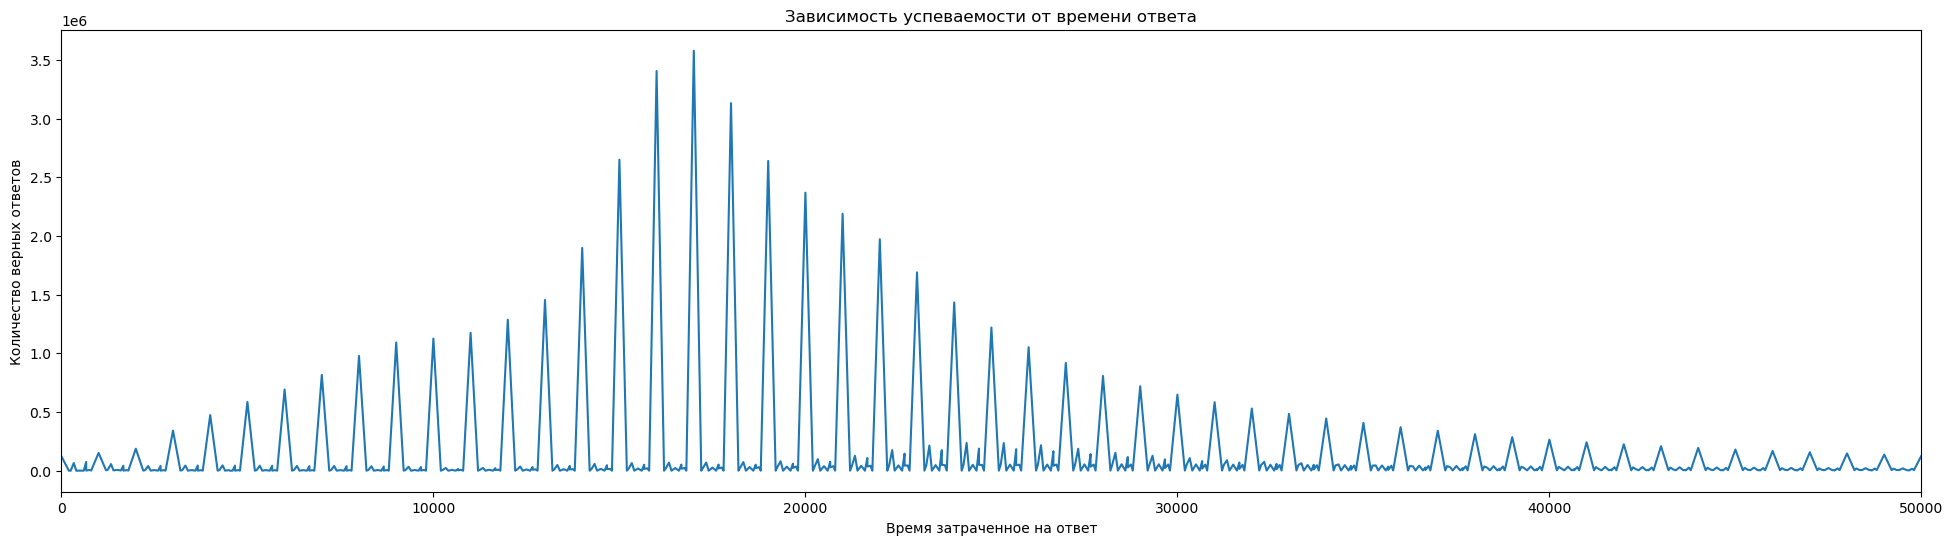

In [ ]:
# график зависимости успеваемости от времени ответа
plt.figure(figsize = (24, 6))
plt.title('Зависимость успеваемости от времени ответа')
plt.xlabel('Время затраченное на ответ')
plt.ylabel('Количество верных ответов')
plt.xlim(0, 50000)
plt.ylim(-2, 4.5)
plt.plot(summed_df['question_elapsed_time'], summed_df['answered_correctly'])
plt.show()

<Axes: title={'center': 'Зависимость верных ответов от полученных пояснений'}, ylabel='answered_correctly'>

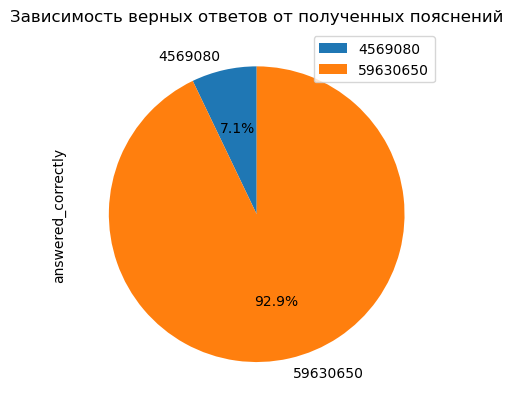

In [ ]:

# диаграмма зависимости успеваемости от полученных пояснений
summed_df_2.plot.pie(y='answered_correctly', labels=summed_df_2['answered_correctly'], autopct='%1.1f%%', startangle=90,title = 'Зависимость верных ответов от полученных пояснений', fontsize=10)

<Axes: title={'center': 'Зависимость верных ответов от разделов'}, ylabel='answered_correctly'>

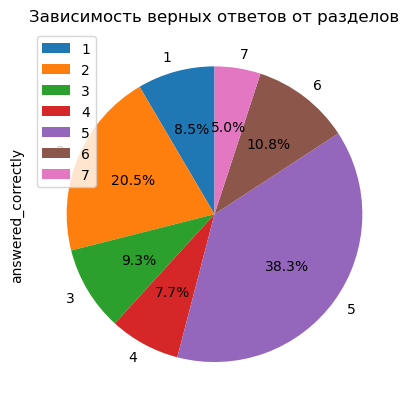

In [ ]:
# диаграмма зависимости успеваемости от разделов
summed_df_3.plot.pie(y='answered_correctly', labels=summed_df_3['part'], autopct='%1.1f%%', startangle=90,title = 'Зависимость верных ответов от разделов', fontsize=10)

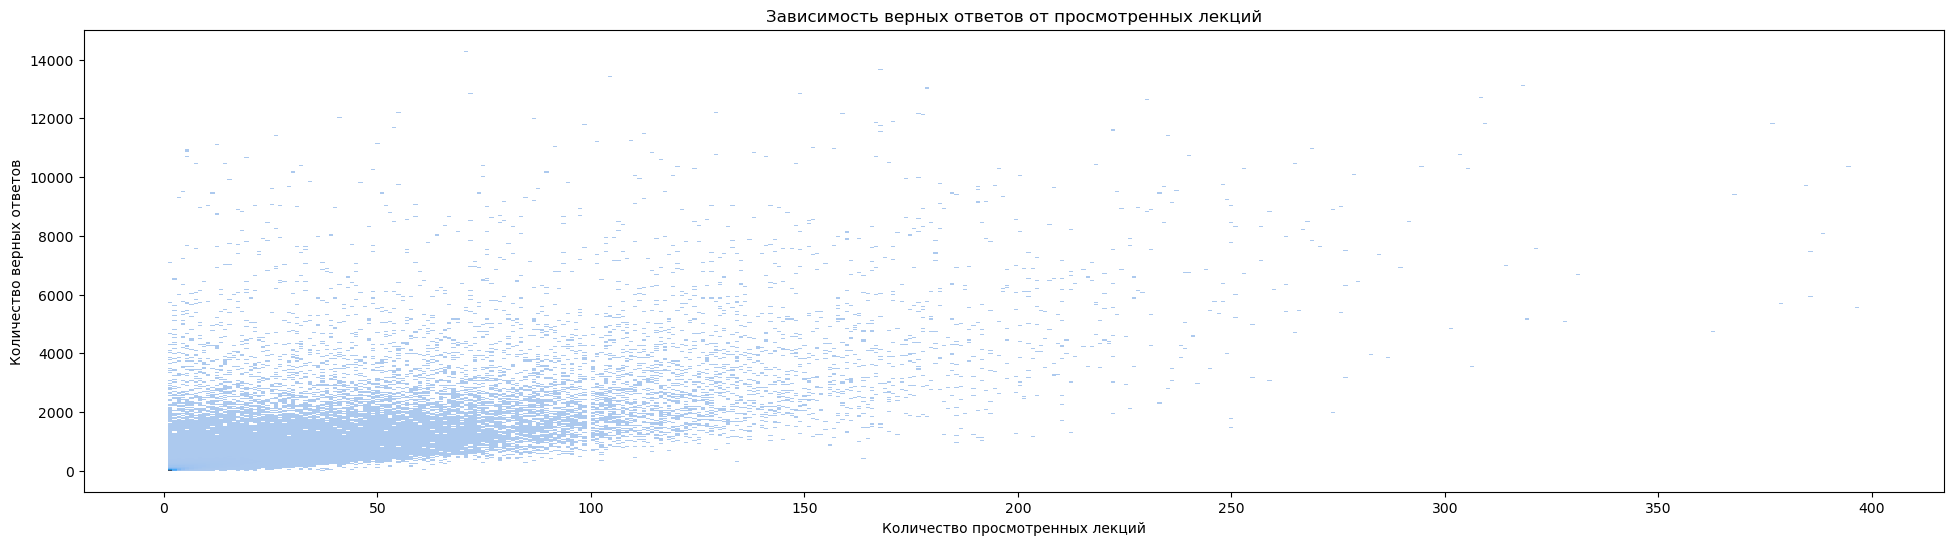

In [ ]:
# Зависимость верных ответов от просмотренных лекций
plt.figure(figsize = (24, 6))

sns.histplot(df_temp_16,x='content_type_id',y='answered_correctly',bins=400)
plt.title('Зависимость верных ответов от просмотренных лекций')
plt.xlabel('Количество просмотренных лекций')
plt.ylabel('Количество верных ответов')
plt.show()

# Выводы

 ### - Наиболее легкий - 1 раздел;
 ### - Наибольшее количество верных ответов в интервале от 10 до 30 секунд на ответ:
 ### - Наибольшее количество верных ответов при полученном пояснении;
 ### - Наибольшее количество верных ответов в 5-ом разделе;
 ### - Наибольшее количество верных ответов среди пользователей, которые смотрели лекции;
 ## - На успеваемость пользователей наибольшее влияние оказали: раздел, полученные пояснения и просмотренные лекции